<a href="https://colab.research.google.com/github/nabhgarg/Forecasting-and-Comparing-time-series-of-frequency-of-road-accidents-/blob/main/Region_wise_Analysis_Nabh.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Import Libraries**

In [ ]:
import numpy as np
import pandas as pd
from pandas.plotting import autocorrelation_plot

import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.arima_model import ARMA
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
%matplotlib inline

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


**Upload** **Dataset**

In [ ]:
from google.colab import files 
uploaded = files.upload()

**Useful Functions**

In [ ]:

# transform a time series dataset into a supervised learning dataset
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
	n_vars = 1 if type(data) is list else data.shape[1]
	df = pd.DataFrame(data)
	cols = list()
	# input sequence (t-n, ... t-1)
	for i in range(n_in, 0, -1):
		cols.append(df.shift(i))
	# forecast sequence (t, t+1, ... t+n)
	for i in range(0, n_out):
		cols.append(df.shift(-i))
	# put it all together
	agg = pd.concat(cols, axis=1)
	# drop rows with NaN values
	if dropnan:
		agg.dropna(inplace=True)
	return agg.values


# split a univariate dataset into train/test sets
def train_test_split(data, n_test):
	return data[:-n_test, :], data[-n_test:, :]
 
# fit an random forest model and make a one step prediction
def random_forest_forecast(train, testX):
	# transform list into array
	train = np.asarray(train)
	# split into input and output columns
	trainX, trainy = train[:, :-1], train[:, -1]
	# fit model
	model = RandomForestRegressor(n_estimators=1000)
	model.fit(trainX, trainy)
	# make a one-step prediction
	yhat = model.predict([testX])
	return yhat[0]
 
# walk-forward validation for univariate data
def walk_forward_validation(data, n_test):
	predictions = list()
	# split dataset
	train, test = train_test_split(data, n_test)
	# seed history with training dataset
	history = [x for x in train]
	# step over each time-step in the test set
	for i in range(len(test)):
		# split test row into input and output columns
		testX, testy = test[i, :-1], test[i, -1]
		# fit model on history and make a prediction
		yhat = random_forest_forecast(history, testX)
		# store forecast in list of predictions
		predictions.append(yhat)
		# add actual observation to history for the next loop
		history.append(test[i])
		# summarize progress
		print('>expected=%.1f, predicted=%.1f' % (testy, yhat))
	# estimate prediction error
	error = mean_absolute_error(test[:, -1], predictions)
	return error, test[:, -1], predictions

**North Region**

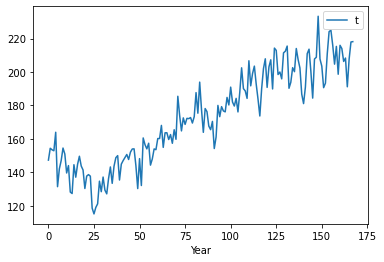

In [ ]:
dfn = pd.read_csv('final-North.csv')
dfn = dfn.rename(columns = {'to_be_index' : 'Year'})
dfn = dfn.set_index('Year')
dfn.plot()

In [ ]:
dfn.insert(1, "t-1", 1) 
dfn['t-1'] = dfn['t'].shift(1)
dfn.head()

,t,t-1
Year,,
0,147.347104,NaN
1,154.434994,147.347104
2,153.503443,154.434994
3,152.936411,153.503443
4,163.993520,152.936411


>expected=224.9, predicted=225.4
>expected=216.0, predicted=214.9
>expected=204.7, predicted=203.3
>expected=215.3, predicted=214.9
>expected=198.7, predicted=198.9
>expected=216.0, predicted=215.1
>expected=214.0, predicted=214.0
>expected=206.3, predicted=207.2
>expected=208.3, predicted=208.0
>expected=191.2, predicted=190.9
>expected=207.7, predicted=207.7
>expected=217.9, predicted=216.1
Mean Absolute Error: 0.651


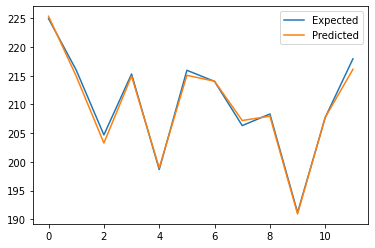

In [ ]:
nvalues = dfn.values
# transform the time series data into supervised learning
data1 = series_to_supervised(nvalues)
# evaluate
mae, y, yhat = walk_forward_validation(data1, 12)
print('Mean Absolute Error: %.3f' % mae)
# plot expected vs predicted
plt.plot(y, label='Expected')
plt.plot(yhat, label='Predicted')
plt.legend()
plt.show()

**Central Zone**

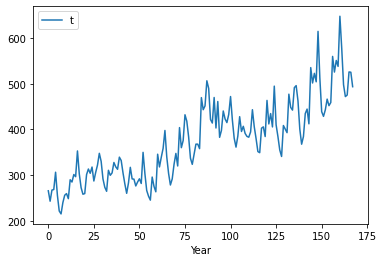

In [ ]:
dfc = pd.read_csv('final-Central.csv')
dfc = dfc.rename(columns = {'to_be_index' : 'Year'})
dfc = dfc.set_index('Year')
dfc.plot()

In [ ]:
dfc.insert(1, "t-1", 1) 
dfc['t-1'] = dfc['t'].shift(1)
dfc.head()

,t,t-1
Year,,
0,265.598027,NaN
1,242.786683,265.598027
2,267.200986,242.786683
3,268.310727,267.200986
4,306.288533,268.310727


>expected=459.1, predicted=465.9
>expected=560.0, predicted=532.7
>expected=525.8, predicted=534.8
>expected=551.2, predicted=554.0
>expected=538.2, predicted=536.3
>expected=648.1, predicted=585.2
>expected=578.1, predicted=559.8
>expected=497.9, predicted=498.8
>expected=472.0, predicted=471.4
>expected=475.5, predicted=475.8
>expected=526.0, predicted=527.3
>expected=525.4, predicted=525.8
North Region
Mean Absolute Error: 11.059


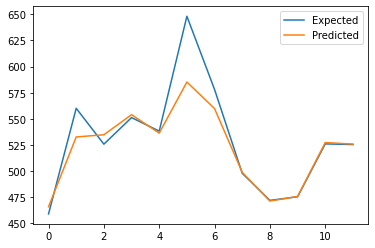

In [ ]:
cvalues = dfc.values
# transform the time series data into supervised learning
data1 = series_to_supervised(cvalues)
# evaluate
mae, y, yhat = walk_forward_validation(data1, 12)
print('North Region')
print('Mean Absolute Error: %.3f' % mae)
# plot expected vs predicted
plt.plot(y, label='Expected')
plt.plot(yhat, label='Predicted')
plt.legend()
plt.show()

**East Zone**

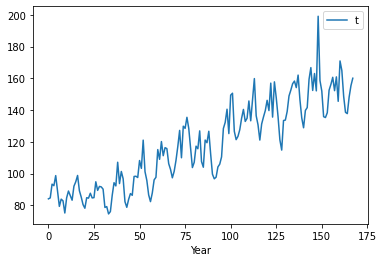

In [ ]:
dfe = pd.read_csv('final-East.csv')
dfe = dfe.rename(columns = {'to_be_index' : 'Year'})
dfe = dfe.set_index('Year')
dfe.plot()

In [ ]:
dfe.insert(1, "t-1", 1) 
dfe['t-1'] = dfe['t'].shift(1)
dfe.head()

,t,t-1
Year,,
0,84.064458,NaN
1,84.646374,84.064458
2,93.330349,84.646374
3,92.345568,93.330349
4,98.701880,92.345568


>expected=156.1, predicted=157.1
>expected=160.6, predicted=159.8
>expected=152.2, predicted=152.3
>expected=160.9, predicted=160.7
>expected=145.5, predicted=146.6
>expected=170.9, predicted=164.0
>expected=164.9, predicted=164.7
>expected=148.6, predicted=148.8
>expected=138.5, predicted=138.9
>expected=137.7, predicted=138.3
>expected=148.2, predicted=148.5
>expected=155.4, predicted=156.2
Mean Absolute Error: 1.038


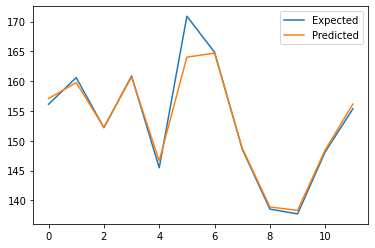

In [ ]:
evalues = dfe.values
# transform the time series data into supervised learning
data1 = series_to_supervised(evalues)
# evaluate
mae, y, yhat = walk_forward_validation(data1, 12)
print('Mean Absolute Error: %.3f' % mae)
# plot expected vs predicted
plt.plot(y, label='Expected')
plt.plot(yhat, label='Predicted')
plt.legend()
plt.show()

**North-East Region**

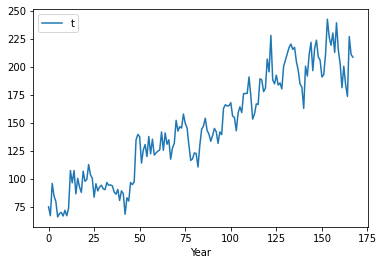

In [ ]:
dfne = pd.read_csv('final-North_east.csv')
dfne = dfne.rename(columns = {'to_be_index' : 'Year'})
dfne = dfne.set_index('Year')
dfne.plot()

In [ ]:
dfne.insert(1, "t-1", 1) 
dfne['t-1'] = dfne['t'].shift(1)
dfne.head()

,t,t-1
Year,,
0,75.466667,NaN
1,67.466667,75.466667
2,96.266667,67.466667
3,85.066667,96.266667
4,80.266667,85.066667


>expected=219.5, predicted=222.8
>expected=230.4, predicted=226.0
>expected=213.1, predicted=212.1
>expected=239.5, predicted=234.5
>expected=215.2, predicted=216.0
>expected=203.2, predicted=203.5
>expected=181.6, predicted=181.8
>expected=200.8, predicted=201.3
>expected=184.3, predicted=184.3
>expected=173.9, predicted=176.7
>expected=227.2, predicted=227.7
>expected=211.2, predicted=211.2
Mean Absolute Error: 1.570


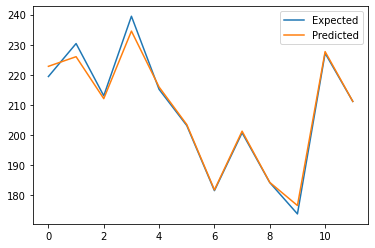

In [ ]:
nevalues = dfne.values
# transform the time series data into supervised learning
data1 = series_to_supervised(nevalues)
# evaluate
mae, y, yhat = walk_forward_validation(data1, 12)
print('Mean Absolute Error: %.3f' % mae)
# plot expected vs predicted
plt.plot(y, label='Expected')
plt.plot(yhat, label='Predicted')
plt.legend()
plt.show()

**South Region**

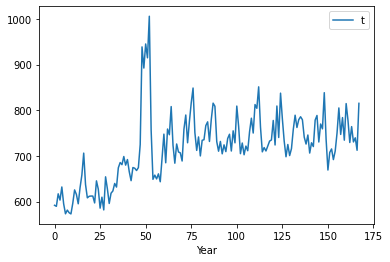

In [ ]:
dfs = pd.read_csv('final-South.csv')
dfs = dfs.rename(columns = {'to_be_index' : 'Year'})
dfs = dfs.set_index('Year')
dfs.plot()

In [ ]:
dfs.insert(1, "t-1", 1) 
dfs['t-1'] = dfs['t'].shift(1)
dfs.head()

,t,t-1
Year,,
0,591.666667,NaN
1,589.402697,591.666667
2,616.811175,589.402697
3,603.131021,616.811175
4,631.840077,603.131021


>expected=750.1, predicted=750.1
>expected=805.1, predicted=808.4
>expected=747.0, predicted=747.4
>expected=784.0, predicted=783.4
>expected=734.4, predicted=734.7
>expected=814.6, predicted=813.3
>expected=778.2, predicted=778.8
>expected=729.3, predicted=728.9
>expected=764.2, predicted=764.7
>expected=730.6, predicted=730.8
>expected=739.6, predicted=740.1
>expected=712.3, predicted=711.6
Mean Absolute Error: 0.734


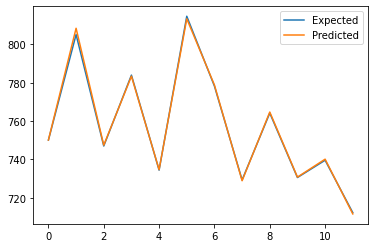

In [ ]:
svalues = dfs.values
# transform the time series data into supervised learning
data1 = series_to_supervised(svalues)
# evaluate
mae, y, yhat = walk_forward_validation(data1, 12)
print('Mean Absolute Error: %.3f' % mae)
# plot expected vs predicted
plt.plot(y, label='Expected')
plt.plot(yhat, label='Predicted')
plt.legend()
plt.show()



**West Region**

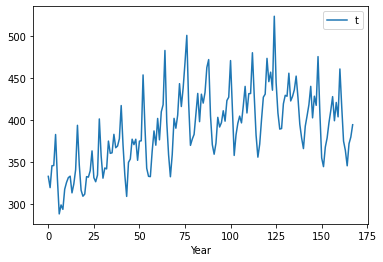

In [ ]:
dfw = pd.read_csv('final-West.csv')
dfw = dfw.rename(columns = {'to_be_index' : 'Year'})
dfw = dfw.set_index('Year')
dfw.plot()

In [ ]:
dfw.insert(1, "t-1", 1) 
dfw['t-1'] = dfw['t'].shift(1)
dfw.head()

,t,t-1
Year,,
0,332.967581,NaN
1,319.600998,332.967581
2,345.586035,319.600998
3,345.835412,345.586035
4,382.743142,345.835412


>expected=411.2, predicted=410.0
>expected=427.8, predicted=428.2
>expected=399.1, predicted=398.4
>expected=420.8, predicted=420.6
>expected=403.7, predicted=403.6
>expected=460.6, predicted=459.8
>expected=415.9, predicted=416.1
>expected=374.9, predicted=375.1
>expected=363.8, predicted=363.4
>expected=345.5, predicted=345.5
>expected=371.8, predicted=371.1
>expected=379.8, predicted=378.6
Mean Absolute Error: 0.533


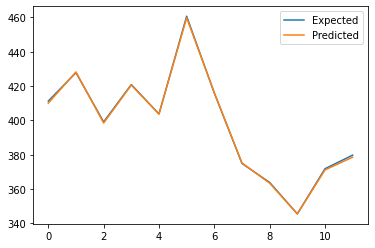

In [ ]:
wvalues = dfw.values
# transform the time series data into supervised learning
data1 = series_to_supervised(wvalues)
# evaluate
mae, y, yhat = walk_forward_validation(data1, 12)
print('Mean Absolute Error: %.3f' % mae)
# plot expected vs predicted
plt.plot(y, label='Expected')
plt.plot(yhat, label='Predicted')
plt.legend()
plt.show()